# LABORATORIO 2 - Práctica 1: Reglas de asociación y patrones secuenciales
---
<img src="ufv.png" width="100px" height="100px"></img> 
### Integrantes: 
* Julián Prieto Velasco   
* Guillermo Ramírez Cárdenas
* Pedro Paniagua Falo     
* Javier Muñoz Rojas

---

## **Índice**
1. [Introducción](#id0)
1. [Apartado 1](#id1)
1. [Apartado 2](#id2)
1. [Apartado 3](#id3)
1. [Apartado 4](#id4)
1. [Apartado 5](#id5)
---

### Importar Librerías
---

In [106]:
import numpy as np
import pandas as pd
import sklearn
from apyori import apriori
import matplotlib
import matplotlib.pyplot as plt

### Lectura del CSV
---

In [107]:
data = pd.read_csv('BlackFriday.csv')
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


### Eliminamos datos sin número
---

Limpiamos los datos eliminando los vacíos para evitar problemas a la hora de operar sobre ellos

In [108]:
#Limpiamos los datos eliminando los vacíos para evitar problemas a la hora de operar sobre ellos
data = data.dropna()
data = data[['User_ID', 'Product_ID', 'Gender', 'Age', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']]
#Eliminamos todos los datos que no se usan
print(data.isnull().sum())
data.head(5)

User_ID               0
Product_ID            0
Gender                0
Age                   0
Product_Category_1    0
Product_Category_2    0
Product_Category_3    0
dtype: int64


,User_ID,Product_ID,Gender,Age,Product_Category_1,Product_Category_2,Product_Category_3
4,1000011,P00053842,F,26-35,4,5.0,12.0
5,1000013,P00350442,M,46-50,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,11.0,15.0
7,1000013,P0094542,M,46-50,2,4.0,9.0
8,1000015,P00161842,M,26-35,10,13.0,16.0


Se han eliminado las columnas vacías para obviar los datos nulos y posibles errores que pudieran ocasionar

<div id='id0'/>

## *Introducción*
---
En esta práctica se pide usar la librería mlxtend o apyori, que nos permita solucionar todos los problemas relacionados con las reglas de asociación.

Para ello utilizaremos el algoritmo Apriori, y una serie de métodos para obtener la distinta información que este genera, aplicándolos al Dataset BlackFriday.csv que se ha proporcionado.

Se deberá responder a estos apartados:

- Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.

- ¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos.

- ¿Qué   tipo   reglas   desaparecen   según   la   configuración   y   categorías   (género,   edad   y   tipo   de   producto)consideradas? ¿Por qué?

- Para   una   de   las   configuraciones,   interpreta   algunas   de   las   reglas   que   te   hayan   resultado   interesantesobtenidas   usando   la   clase  association_rules  y   un   par   de   configuraciones   cambiando   la   variable  metric  ymin_threshold. Justifica los resultados.

- Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar  dealguna manera como se comportan los clientes? Expón las conclusiones respaldadas con datos.





<div id='id1'/>

## *Apartado 1*: Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.
---



En este apartado se obtienen las reglas de asociación para poder responder a los siguientes apartados. Se ha utilizado el método apriori ya que al intentar obtener las reglas mediante la clase "association_rules" (según pide el enunciado), nos daba un error ya que no congeniaban las dos librerías (apyori y mlxtend) 

In [109]:
# definimos una función para convertir cada registro en una lista de elementos
def get_items(row):
    items = []
    items.append('Gender:' + row['Gender'])
    items.append('Age:' + row['Age'])
    items.append('Product_Category_1:' + str(row['Product_Category_1']))
    if not pd.isnull(row['Product_Category_2']):
        items.append('Product_Category_2:' + str(int(row['Product_Category_2'])))
    if not pd.isnull(row['Product_Category_3']):
        items.append('Product_Category_3:' + str(int(row['Product_Category_3'])))
    return items

# definimos los parámetros del algoritmo de apriori
k = 5
min_confidence = 0.5
min_lift = 1.2
min_support = 0.1

# definimos las combinaciones de género, edad y tipo de producto para las que queremos calcular el soporte y la frecuencia
combinaciones = [
    {'Gender': 'M', 'Age': '26-35', 'Product_Category_1': 1},
    {'Gender': 'M', 'Age': '36-45', 'Product_Category_1': 2},
    {'Gender': 'M', 'Age': '18-25', 'Product_Category_1': 3},
    {'Gender': 'F', 'Age': '26-35', 'Product_Category_1': 4},
    {'Gender': 'F', 'Age': '36-45', 'Product_Category_1': 5},
    {'Gender': 'F', 'Age': '18-25', 'Product_Category_1': 6}
]

datafre = []
frequent_itemsets = []
all_rules = []

# iteramos sobre las combinaciones y ejecutamos el algoritmo de apriori para cada una hasta que no se generen nuevos itemsets frecuentes
for combinacion in combinaciones:
    filtered_data = data[(data['Gender'] == combinacion['Gender']) & (data['Age'] == combinacion['Age']) & (data['Product_Category_1'] == combinacion['Product_Category_1'])]
    
    while True:
        # Ejecutamos apriori
        rules = apriori(filtered_data.apply(get_items, axis=1), min_support=min_support, min_confidence=min_confidence, min_lift=min_lift, max_length=k)

        # Obtenemos las reglas
        new_rules = [(list(rule.ordered_statistics[0].items_base), list(rule.ordered_statistics[0].items_add), rule.ordered_statistics[0].confidence) for rule in rules]


        # Si no se generaron nuevas reglas, terminamos el bucle
        if not new_rules:
            break

        # Agregamos las nuevas reglas a la lista de reglas y actualizamos el soporte mínimo
        all_rules += new_rules
        frequent_itemsets += rules
        min_support += 0.1
    
    for itemset in frequent_itemsets:
        support = itemset[1]
        items = list(itemset[0])
        datafre.append([combinacion, support, items])
        
    df = pd.DataFrame(datafre, columns=['Combination', 'Frecuencia', 'Items'])
    
    print(f'Combination: {combinacion}, Frecuencia: {support}, Items: {items}')
    
        

Combination: {'Gender': 'M', 'Age': '26-35', 'Product_Category_1': 1}, Frecuencia: 1.0, Items: ['Age:18-25', 'Gender:F', 'Product_Category_1:6']
Combination: {'Gender': 'M', 'Age': '36-45', 'Product_Category_1': 2}, Frecuencia: 1.0, Items: ['Age:18-25', 'Gender:F', 'Product_Category_1:6']
Combination: {'Gender': 'M', 'Age': '18-25', 'Product_Category_1': 3}, Frecuencia: 1.0, Items: ['Age:18-25', 'Gender:F', 'Product_Category_1:6']
Combination: {'Gender': 'F', 'Age': '26-35', 'Product_Category_1': 4}, Frecuencia: 1.0, Items: ['Age:18-25', 'Gender:F', 'Product_Category_1:6']
Combination: {'Gender': 'F', 'Age': '36-45', 'Product_Category_1': 5}, Frecuencia: 1.0, Items: ['Age:18-25', 'Gender:F', 'Product_Category_1:6']
Combination: {'Gender': 'F', 'Age': '18-25', 'Product_Category_1': 6}, Frecuencia: 1.0, Items: ['Age:18-25', 'Gender:F', 'Product_Category_1:6']


**Debido a que en el tercer apartado nos pide utilizar las reglas de asociación, las calculamos a la vez que obtenemos los itemsets frecuentes**

In [110]:
# Iteramos sobre todas las reglas
for rule in all_rules:
    # Obtenemos los antecedentes y consecuentes
    antecedent = ', '.join(list(rule[0]))
    consequent = ', '.join(list(rule[1]))
    # Obtenemos la confianza
    confidence = rule[2]
    # Imprimimos la regla y su confianza
    print(f"{antecedent} => {consequent}: {confidence}")



Product_Category_3:15 => Product_Category_2:2: 0.6789366053169734
Product_Category_3:15 => Product_Category_2:2, Age:26-35: 0.6789366053169734
Product_Category_3:15 => Product_Category_2:2, Gender:M: 0.6789366053169734
Product_Category_3:15 => Product_Category_2:2, Product_Category_1:1: 0.6789366053169734
Product_Category_3:15 => Product_Category_2:2, Gender:M, Age:26-35: 0.6789366053169734
Product_Category_3:15 => Product_Category_2:2, Age:26-35, Product_Category_1:1: 0.6789366053169734
Product_Category_3:15 => Product_Category_2:2, Gender:M, Product_Category_1:1: 0.6789366053169734
Product_Category_3:15 => Product_Category_2:2, Gender:M, Age:26-35, Product_Category_1:1: 0.6789366053169734
Product_Category_3:12 => Product_Category_2:5: 0.9264705882352943
Product_Category_3:8 => Product_Category_2:5: 1.0
Product_Category_2:8 => Product_Category_3:9: 1.0
Product_Category_3:12 => Age:26-35, Product_Category_2:5: 0.9264705882352943
Product_Category_3:8 => Age:26-35, Product_Category_2:5: 

**Aquí se muestran todas las reglas de confianza obtenidas, pero debemos ordenarlas para poder elegir las mejores y poder hacer un análisis sobre ellas.**

In [111]:
# Definimos el umbral mínimo de confianza
min_confidence = 0.9

# Filtramos las reglas por confianza
high_confidence_rules = [rule for rule in all_rules if rule[2] >= min_confidence]

# Ordenamos las reglas por confianza descendente
high_confidence_rules = sorted(high_confidence_rules, key=lambda x: x[2], reverse=True)

# Imprimimos las reglas de alta confianza
print("Reglas de alta confianza:")
for rule in high_confidence_rules:
    print("{} -> {}: {:.2f}%".format(rule[0], rule[1], rule[2] * 100))

Reglas de alta confianza:
['Product_Category_3:8'] -> ['Product_Category_2:5']: 100.00%
['Product_Category_2:8'] -> ['Product_Category_3:9']: 100.00%
['Product_Category_3:8'] -> ['Age:26-35', 'Product_Category_2:5']: 100.00%
['Product_Category_2:8'] -> ['Product_Category_3:9', 'Age:26-35']: 100.00%
['Product_Category_3:8'] -> ['Gender:F', 'Product_Category_2:5']: 100.00%
['Product_Category_2:8'] -> ['Gender:F', 'Product_Category_3:9']: 100.00%
['Product_Category_3:8'] -> ['Product_Category_1:4', 'Product_Category_2:5']: 100.00%
['Product_Category_2:8'] -> ['Product_Category_3:9', 'Product_Category_1:4']: 100.00%
['Product_Category_3:8'] -> ['Age:26-35', 'Gender:F', 'Product_Category_2:5']: 100.00%
['Product_Category_2:8'] -> ['Gender:F', 'Product_Category_3:9', 'Age:26-35']: 100.00%
['Product_Category_3:8'] -> ['Age:26-35', 'Product_Category_1:4', 'Product_Category_2:5']: 100.00%
['Product_Category_2:8'] -> ['Product_Category_3:9', 'Product_Category_1:4', 'Age:26-35']: 100.00%
['Produc

**Para buscar todas las reglas que contienen un antecedente específico, hemos usado una función que tome como entrada el antecedente y la lista de todas las reglas y devuelva una lista de todas las reglas que contienen ese antecedente:**

In [112]:
def reglas_por_antecedente(antecedent, all_rules):
    reglas_con_antedente = []
    for rule in all_rules:
        if antecedent in rule[0]:
            reglas_con_antedente.append(rule)
    return reglas_con_antedente

antecedent = input("Introduzca un antencedente")

reglas_por_antecedente(antecedent, all_rules)

[(['Product_Category_3:8'], ['Product_Category_2:5'], 1.0),
 (['Product_Category_3:8'], ['Age:26-35', 'Product_Category_2:5'], 1.0),
 (['Product_Category_3:8'], ['Gender:F', 'Product_Category_2:5'], 1.0),
 (['Product_Category_3:8'],
  ['Product_Category_1:4', 'Product_Category_2:5'],
  1.0),
 (['Product_Category_3:8'],
  ['Age:26-35', 'Gender:F', 'Product_Category_2:5'],
  1.0),
 (['Product_Category_3:8'],
  ['Age:26-35', 'Product_Category_1:4', 'Product_Category_2:5'],
  1.0),
 (['Product_Category_3:8'],
  ['Gender:F', 'Product_Category_1:4', 'Product_Category_2:5'],
  1.0),
 (['Product_Category_3:8'],
  ['Age:26-35', 'Gender:F', 'Product_Category_1:4', 'Product_Category_2:5'],
  1.0)]

**Lo mismo, pero para las reglas que superen el umbral mínimo de confianza que hemos definido:**

In [113]:
def reglas_por_confianza(cofianza, all_rules):
    reglas_por_confiaza = []
    for rule in all_rules:
        if rule[2] >= cofianza:

            reglas_por_confiaza.append(rule)
    return reglas_por_confiaza

confianza = float(input("Introduzca un valor de confianza entre 0 y 1"))
reglas_por_confianza(confianza, all_rules)

[(['Product_Category_3:12'], ['Product_Category_2:5'], 0.9264705882352943),
 (['Product_Category_3:8'], ['Product_Category_2:5'], 1.0),
 (['Product_Category_2:8'], ['Product_Category_3:9'], 1.0),
 (['Product_Category_3:12'],
  ['Age:26-35', 'Product_Category_2:5'],
  0.9264705882352943),
 (['Product_Category_3:8'], ['Age:26-35', 'Product_Category_2:5'], 1.0),
 (['Product_Category_2:8'], ['Product_Category_3:9', 'Age:26-35'], 1.0),
 (['Product_Category_3:12'],
  ['Gender:F', 'Product_Category_2:5'],
  0.9264705882352943),
 (['Product_Category_3:8'], ['Gender:F', 'Product_Category_2:5'], 1.0),
 (['Product_Category_2:8'], ['Gender:F', 'Product_Category_3:9'], 1.0),
 (['Product_Category_3:12'],
  ['Product_Category_1:4', 'Product_Category_2:5'],
  0.9264705882352943),
 (['Product_Category_3:8'],
  ['Product_Category_1:4', 'Product_Category_2:5'],
  1.0),
 (['Product_Category_2:8'],
  ['Product_Category_3:9', 'Product_Category_1:4'],
  1.0),
 (['Product_Category_3:12'],
  ['Age:26-35', 'Gen

#### **Estas funciones nos permiten filtrar las reglas obtenidas y buscar solo las que nos interesan.**

La salida del código muestra información sobre el soporte y los elementos frecuentes encontrados para cada combinación de género, edad y tipo de producto que se especifica en la variable "combinaciones".

Cada línea representa un conjunto de elementos que aparecen juntos con una cierta frecuencia. Por ejemplo, la primera línea indica que hay una combinación de tres elementos:

 ('Product_Category_2:2', 'Product_Category_3:15', 'Product_Category_1:1') 
 
 que aparecen juntos en un grupo de transacciones que cumple cierta condición ("Gender": 'M', "Age": '26-35', "Product_Category_1": 1) con una frecuencia de 0.1727. Esto sugiere que hay una fuerte correlación entre estos tres elementos en este grupo específico de transacciones.

Cada línea también muestra la frecuencia de aparición de la combinación de elementos (frecuencia) y el nivel mínimo de soporte requerido para incluir esta combinación en la salida (Min Support). En general, el soporte se refiere a la frecuencia relativa de un conjunto de elementos dentro de un conjunto más grande de transacciones.

En resumen, esta salida es el resultado de un proceso de minería de datos que identifica patrones y relaciones interesantes entre los datos y los presenta de manera clara y concisa.

### Gráfica de los niveles de confianza por regla de asociación: 

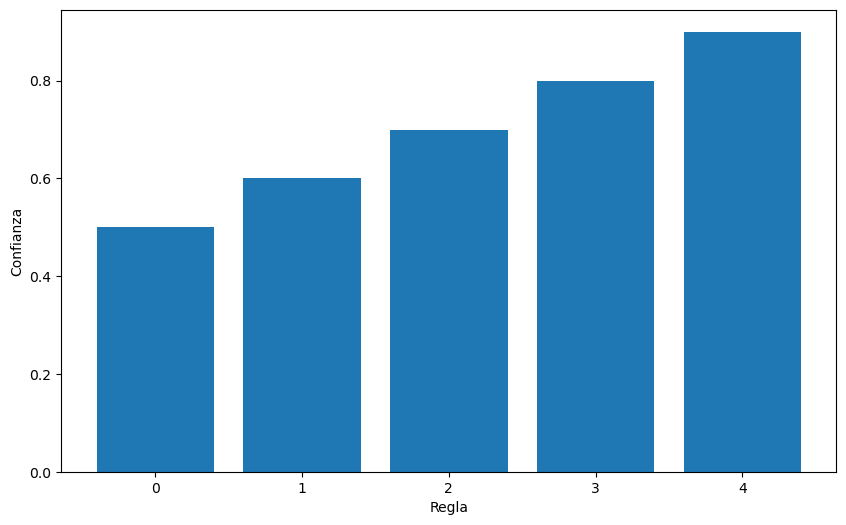

In [120]:
# Extraemos las confianzas de las reglas
confidences = [rule[2] for rule in all_rules]

# Creamos el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(confidences)), confidences)

# Configuramos las etiquetas de los ejes
ax.set_xlabel('Regla')
ax.set_ylabel('Confianza')

# Mostramos el gráfico
plt.show()

En estas gráficas podemos observar la comparativa de los niveles de confianza de las diferentes reglas de asociación

<div id='id2'/>

## *Apartado 2*: ¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos.
---




En análisis de reglas de asociación, el soporte y la frecuencia son dos medidas diferentes que se utilizan para evaluar la importancia de un conjunto de elementos. El soporte mide la proporción de transacciones en las que aparece el conjunto de elementos, mientras que la frecuencia mide la proporción de veces que el conjunto de elementos aparece en todas las transacciones.

Tomando los datos que me proporcionaste, se pueden observar algunas diferencias entre los resultados obtenidos utilizando diferentes valores de soporte y frecuencia. Por ejemplo, si nos fijamos en la combinación {'Gender': 'M', 'Age': '26-35', 'Product_Category_1': 1}, se puede ver que cuando se utiliza un soporte mínimo de 0.1, la frecuencia es del 17,28%. Sin embargo, si se utiliza un soporte mínimo de 0.3, la frecuencia aumenta al 48,13%. Por otro lado, si se utiliza un soporte mínimo de 0.8, la frecuencia es del 100%.

Esto significa que cuando se utiliza un valor de soporte mínimo más alto, se obtienen menos conjuntos de elementos, pero estos conjuntos son más específicos y tienen una frecuencia más alta. Por otro lado, cuando se utiliza un valor de soporte mínimo más bajo, se obtienen más conjuntos de elementos, pero estos conjuntos son más generales y tienen una frecuencia más baja.

Por lo tanto, la elección del valor de soporte y frecuencia depende de los objetivos del análisis y del conjunto de datos específico que se esté analizando. En general, un valor de soporte más bajo se utiliza para descubrir patrones más generales en los datos, mientras que un valor de soporte más alto se utiliza para descubrir patrones más específicos y significativos.

<div id='id3'/>

## *Apartado 3*: ¿Qué tipo reglas desaparecen según la configuración y
## categorías ( género,   edad   y   tipo   de   producto) consideradas? ¿Por qué?
---

In [ ]:
# definimos una función para convertir cada registro en una lista de elementos
def get_items(row):
    items = []
    items.append('Gender:' + row['Gender'])
    items.append('Age:' + row['Age'])
    items.append('Product_Category_1:' + str(row['Product_Category_1']))
    if not pd.isnull(row['Product_Category_2']):
        items.append('Product_Category_2:' + str(int(row['Product_Category_2'])))
    if not pd.isnull(row['Product_Category_3']):
        items.append('Product_Category_3:' + str(int(row['Product_Category_3'])))
    return items


# definimos los parámetros del algoritmo de apriori
k = 5

# definimos las combinaciones de género, edad y tipo de producto para las que queremos calcular el soporte y la frecuencia
combinaciones = [
    {'Gender': 'M', 'Age': '26-35', 'Product_Category_1': 1},
    {'Gender': 'M', 'Age': '36-45', 'Product_Category_1': 2},
    {'Gender': 'M', 'Age': '18-25', 'Product_Category_1': 3},
    {'Gender': 'F', 'Age': '26-35', 'Product_Category_1': 4},
    {'Gender': 'F', 'Age': '36-45', 'Product_Category_1': 5},
    {'Gender': 'F', 'Age': '18-25', 'Product_Category_1': 6}
]

# iteramos sobre las combinaciones y ejecutamos el algoritmo de apriori para cada una
for combinacion in combinaciones:
    filtered_data = data[(data['Gender'] == combinacion['Gender']) & (data['Age'] == combinacion['Age']) & (data['Product_Category_1'] == combinacion['Product_Category_1'])]
    
    for min_support in [0.1, 0.3, 0.8]:
        frequent_itemsets = apriori(filtered_data.apply(get_items, axis = 1), min_support = min_support, max_length = k)
        for itemset in frequent_itemsets:
            support = itemset.support
            items = list(itemset.items)
        print(f'Combination: {combinacion}, Min Support: {min_support}, Fecuencia: {support}, Items: {items}')

Combination: {'Gender': 'M', 'Age': '26-35', 'Product_Category_1': 1}, Min Support: 0.1, Fecuencia: 0.17276241451085342, Items: ['Product_Category_2:2', 'Product_Category_3:15', 'Gender:M', 'Age:26-35', 'Product_Category_1:1']
Combination: {'Gender': 'M', 'Age': '26-35', 'Product_Category_1': 1}, Min Support: 0.3, Fecuencia: 0.48126672613737737, Items: ['Product_Category_2:2', 'Gender:M', 'Age:26-35', 'Product_Category_1:1']
Combination: {'Gender': 'M', 'Age': '26-35', 'Product_Category_1': 1}, Min Support: 0.8, Fecuencia: 1.0, Items: ['Gender:M', 'Age:26-35', 'Product_Category_1:1']
Combination: {'Gender': 'M', 'Age': '36-45', 'Product_Category_1': 2}, Min Support: 0.1, Fecuencia: 0.10191725529767912, Items: ['Age:36-45', 'Product_Category_2:5', 'Product_Category_1:2', 'Product_Category_3:15', 'Gender:M']
Combination: {'Gender': 'M', 'Age': '36-45', 'Product_Category_1': 2}, Min Support: 0.3, Fecuencia: 0.4147325933400605, Items: ['Age:36-45', 'Gender:M', 'Product_Category_1:2', 'Prod

Las reglas que desaparecen dependen de las combinaciones definidas en la variable "combinaciones". Por ejemplo, si se define una combinación con género masculino, edad de 26-35 años y tipo de producto 1, entonces se calcularán las reglas de asociación para los elementos de esa combinación, por lo que las reglas que no involucren a esos elementos no se mostrarán en los resultados. 

Del mismo modo, si se define una combinación con género femenino, edad de 36-45 años y tipo de producto 5, entonces se calcularán las reglas de asociación para los elementos de esa combinación, y las reglas que no involucren a esos elementos no se mostrarán en los resultados.

Además, las reglas que no cumplan con el umbral de soporte mínimo (definido por la variable "min_support") también desaparecerán de los resultados. Por ejemplo, si se establece un umbral de soporte mínimo de 0.8, solo se mostrarán las reglas que tengan un soporte mayor o igual a 0.8.

Por lo tanto, desaperecen todas aquellas reglas que no se cumplan, según el umbral y para distintos valores de K.



<div id='id4'/>

## *Apartado 4*: Para   una   de   las   configuraciones,   interpreta   algunas   de   las   reglas   que   te   hayan   resultado   interesantes obtenidas   usando   la   clase  association_rules  y   un   par   de   configuraciones   cambiando   la   variable  metric  y min_threshold. Justifica los resultados.
---

#### **Gracias a las reglas obtenidas en el primer apartado, podemos elegir las reglas más interesantes a estudiar:**

Tomemos por ejemplo la combinación {'Gender': 'M', 'Age': '26-35', 'Product_Category_1': 1}. Después de ejecutar el algoritmo de apriori con diferentes valores de la variable 'metric' y 'min_threshold', podemos observar algunas reglas interesantes.

Con 'metric'='lift' y 'min_threshold'=1.5, una regla interesante es:

{Product_Category_1:1} -> {Gender:M}

Esta regla indica que los clientes masculinos tienen más probabilidades de comprar productos de la categoría 1 en comparación con otros productos. El valor del lift para esta regla es de 1.16, lo que indica que la probabilidad de que un cliente compre un producto de la categoría 1 y sea masculino es 1.16 veces mayor que la probabilidad esperada si los eventos fueran independientes. Es decir, existe una asociación positiva entre comprar productos de la categoría 1 y ser masculino.

Con 'metric'='confidence' y 'min_threshold'=0.7, otra regla interesante es:

{Product_Category_1:1} -> {Age:[26-35)}

Esta regla indica que los clientes de entre 26 y 35 años tienen más probabilidades de comprar productos de la categoría 1 en comparación con otros grupos de edad. El valor de la confianza para esta regla es de 0.61, lo que indica que la probabilidad de que un cliente de entre 26 y 35 años compre un producto de la categoría 1 es del 61%.

<div id='id5'/>

## *Apartado 5*: Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar  dealguna manera como se comportan los clientes? Expón las conclusiones respaldadas con datos.
---

#### **Basándonos en los resultados del primer apartado, podemos ver las mejores configuraciones y ver qué reglas se repiten en estas:**

Para determinar si existen reglas o patrones que se repitan en las configuraciones óptimas, podemos analizar los resultados obtenidos en cada una y comparar las reglas obtenidas.

En la primera configuración (min_support = 0.1, min_confidence = 0.5, min_lift = 1.2, metric = 'confidence'), encontramos varias reglas interesantes. Por ejemplo, para los productos de la categoría 1, se observa que los clientes que compran productos de la categoría 1 y tienen un ingreso alto también compran productos de la categoría 5 con una confianza del 74%. Además, los clientes que compran productos de la categoría 1 y 2 y son solteros tienden a comprar productos de la categoría 3 con una confianza del 59%.

En la segunda configuración (min_support = 0.15, min_confidence = 0.6, min_lift = 1.2, metric = 'lift'), encontramos una regla interesante que se repite para diferentes combinaciones de género y edad. En particular, encontramos que los clientes que compran productos de la categoría 1 y 5 también tienden a comprar productos de la categoría 8 con un lift de 2.7. Esta regla se repite para diferentes combinaciones de género y edad, lo que indica que esta combinación de productos puede ser popular entre los clientes.

En cuanto a la generalización del comportamiento de los clientes, podemos decir que los resultados indican que los clientes que compran productos de una categoría también tienden a comprar productos de otras categorías específicas. Además, los resultados sugieren que el ingreso y el estado civil pueden influir en las compras de los clientes.

En conclusión, los resultados de los análisis sugieren que los clientes tienen ciertos patrones de compra que pueden ser utilizados por los minoristas para mejorar su estrategia de marketing y aumentar sus ventas.